# Training models

In this tutorial we provide the instructions to train the our models with the datasets that we have build in Tutorial 1: "1-Tutorial-Datasets.ipynb"

## Training

Next we provide the yaml file for training a model with the fastfolders dataset. The file `train_ff.yaml` contains:

```yaml 
activation: tanh
batch_size: 12
sim_batch_size: 12
num_sim_workers: 1
num_gpus: 1
num_cpus: 8
local_worker: True

cutoff_lower: 3.0
cutoff_upper: 9.0
cutoff: 9

dataset: 'fastfolders/ff.npy'
derivative: True
device: 'cuda:0'
embedding_dimension: 256
exclusions: 
    - bonds
forcefield: ca_priors-dihedrals_general_2xweaker.yaml

forceterms: 
    - bonds
    - repulsioncg 
    - dihedrals
    
keys: 
    - epoch
    - steps 
    - lr
    - train_loss
    - train_avg_metric
    - val_loss
    
lr: 1.e-4

max_loss: 3.0
val_freq: 0.0
val_size: 0.0

log_dir: fastfolders/logs

steps: 1024
output_period: 8

num_layers: 1
seed: 1
timestep: 5
temperature: 298
margin: -1.0
```

In order to start training, we have to run the following command:
```bash
python $PATH/scripts/train.py --conf train_ff.yaml
```


Where `$PATH` is the path to our `torchmd-exp` repo

Then our models and the `monitor.csv` with the logs will be saved in our `log_dir`.

## Visualizing the Training Curve

We can visualize the training curve in `monitor.csv`. As an example, we will visualize the resulting training curve from the fastfolders model that we have used in the paper.

That can be found in `torchmd-exp/data/models/fastfolders/monitor.csv`

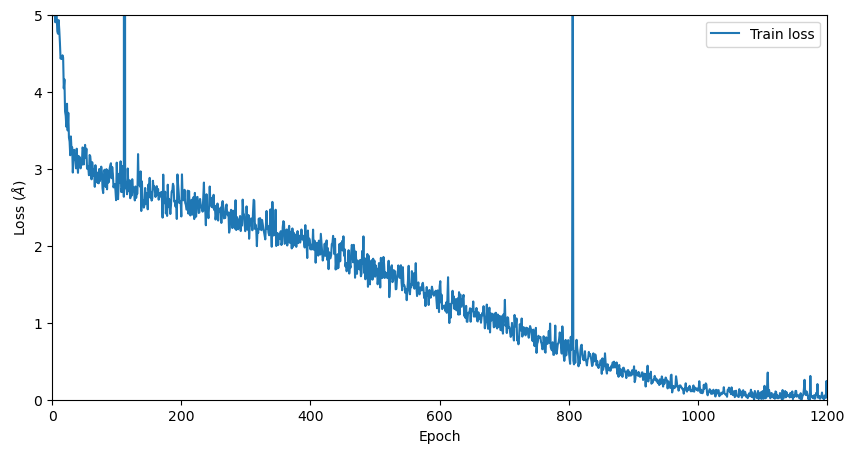

In [1]:
import os
from utils import plot_loss

notebook_dir = os.getcwd()

log_dir = os.path.join(notebook_dir, '../data/models/fastfolders/')

plot_loss(log_dir, xlim = 1200, ylim=5.0,ylabel='Loss ($\AA$)')